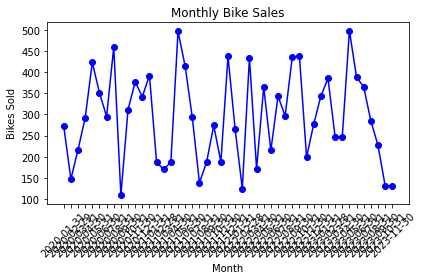

Train Mean Squared Error: 93398.63020584757
Test Mean Squared Error: 88892.63403238755
Predicted number of bikes sold for next month: 833


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate sample data
np.random.seed(0)
months = pd.date_range(start='2020-01-01', end='2023-12-01', freq='M')
bikes_sold = np.random.randint(100, 500, len(months))

# Create DataFrame
data = pd.DataFrame({'Month': months, 'Bikes_Sold': bikes_sold})

# Save sample data to CSV
data.to_csv('monthly_bike_sales.csv', index=False)

# Read sample data from CSV
data = pd.read_csv('monthly_bike_sales.csv')

# Prepare data
X = np.arange(len(data)).reshape(-1, 1)  # Months as input features
y = data['Bikes_Sold'].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize data
plt.plot(data['Month'], y, color='blue', marker='o')
plt.xlabel('Month')
plt.ylabel('Bikes Sold')
plt.title('Monthly Bike Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear regression
theta = np.random.randn(2)
alpha = 0.001  # Reduced learning rate
iterations = 1000

def hypothesis(X, theta):
    return theta[0] + theta[1] * X

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = hypothesis(X, theta)
        error = predictions - y
        theta[0] -= alpha * (1 / m) * np.sum(error)
        theta[1] -= alpha * (1 / m) * np.sum(error * X.flatten())
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

        # Check for numerical instability
        if np.isnan(cost) or np.isinf(cost):
            print("Gradient descent diverged. Reduce learning rate (alpha) or check data preprocessing.")
            return None, None
    
    return theta, cost_history

# Run gradient descent
optimized_theta, _ = gradient_descent(X_train, y_train, theta, alpha, iterations)

if optimized_theta is not None:
    # Make predictions
    train_predictions = hypothesis(X_train, optimized_theta)
    test_predictions = hypothesis(X_test, optimized_theta)

    # Calculate mean squared error
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    print("Train Mean Squared Error:", train_mse)
    print("Test Mean Squared Error:", test_mse)

    # Make predictions for the next month
    next_month = len(data) + 1  # Next month
    next_month_scaled = scaler.transform([[next_month]])  # Scale the input
    predicted_bikes_sold = hypothesis(next_month_scaled, optimized_theta)
    print("Predicted number of bikes sold for next month:", int(predicted_bikes_sold))
